#### Importing The Images

In [1]:
import os

In [2]:
data_dir = '/Users/arthurkogan/Desktop/My_Keras_Pres/cell_images'

In [3]:
os.listdir(data_dir)

['.DS_Store', 'test', 'train']

#### Exploring The Data

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from matplotlib.image import imread

In [6]:
test_path = data_dir+'/test'
train_path = data_dir+'/train'

In [7]:
os.listdir(test_path)

['.DS_Store', 'parasitized', 'uninfected']

In [8]:
os.listdir(train_path)

['.DS_Store', 'parasitized', 'uninfected']

In [9]:
os.listdir(train_path+'/parasitized')[0]

'C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [10]:
para_cell = train_path+'/parasitized'+'/C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [11]:
para_cell

'/Users/arthurkogan/Desktop/My_Keras_Pres/cell_images/train/parasitized/C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [12]:
imread(para_cell).shape

(121, 118, 3)

In [13]:
para_img = imread(para_cell)

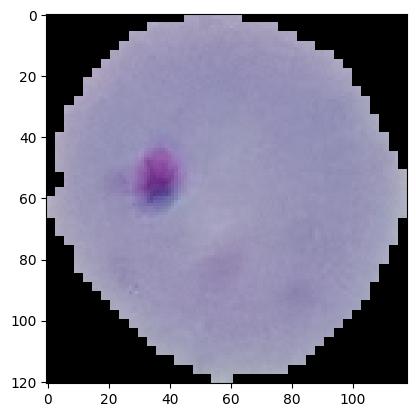

In [14]:
plt.imshow(para_img)

In [15]:
os.listdir(train_path+'/uninfected')[1]

'C205ThinF_IMG_20151106_152003_cell_21.png'

In [16]:
uninfected_cell = train_path+'/uninfected'+'/C205ThinF_IMG_20151106_152003_cell_21.png'

In [17]:
uninfected_img = imread(uninfected_cell)

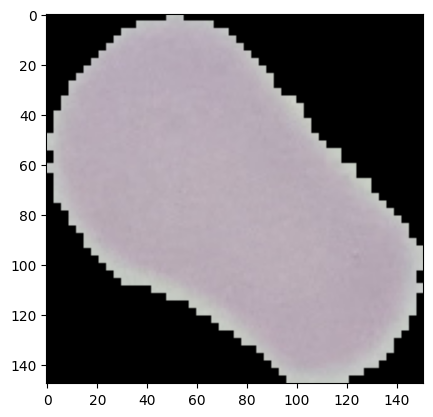

In [18]:
plt.imshow(uninfected_img)

In [19]:
len(os.listdir(train_path+'/parasitized'))

12480

In [20]:
len(os.listdir(train_path+'/uninfected'))

12480

In [21]:
len(os.listdir(test_path+'/parasitized'))

1300

In [22]:
len(os.listdir(test_path+'/uninfected'))

1300

In [23]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'/uninfected'):
    img = imread(test_path+'/uninfected/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [24]:
for i in range(10):
    print(dim1[i], dim2[i], sep=(' X '))

127 X 127
109 X 121
127 X 151
118 X 130
127 X 124
118 X 127
133 X 136
115 X 124
133 X 124
142 X 130


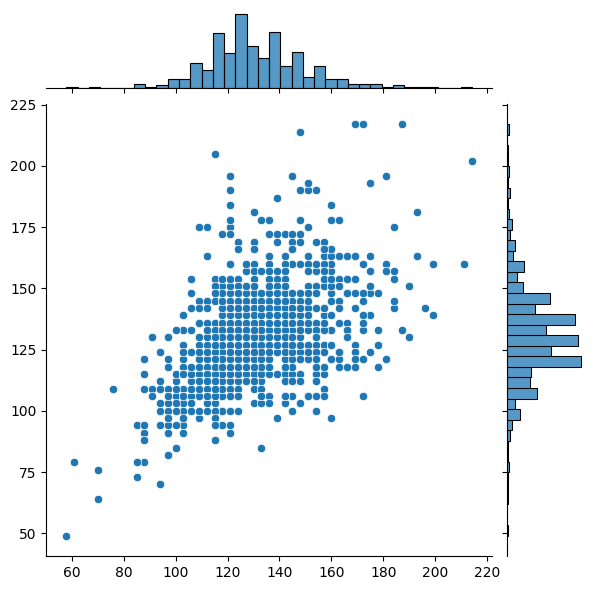

In [25]:
sns.jointplot(x=dim1,y=dim2)

In [26]:
np.mean(dim1)

130.92538461538462

In [27]:
np.mean(dim2)

130.75

In [28]:
image_shape = (130,130,3)

#### Preprocessing The Data

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
#help(ImageDataGenerator)

In [31]:
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,
                               zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')

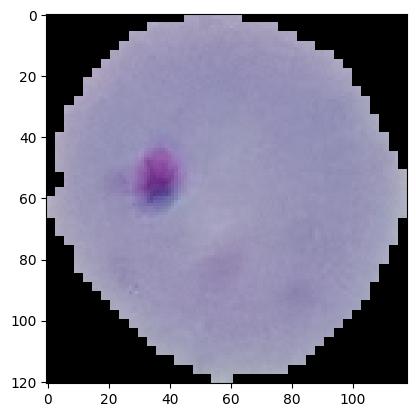

In [32]:
plt.imshow(imread(para_cell))

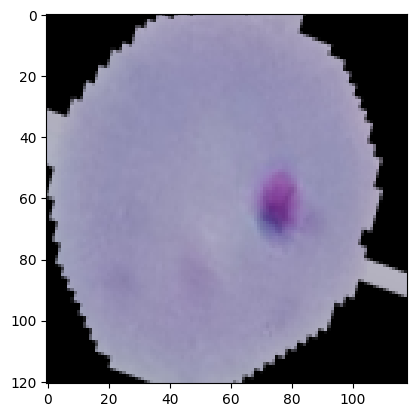

In [78]:
plt.imshow(image_gen.random_transform(para_img))

In [34]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [35]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


#### Building The Model

In [36]:
from tensorflow.keras.models import Sequential

In [37]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [38]:
#ordering or sequencing of layers within a model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128, activation='relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1, activation ='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Metal device set to: Apple M1


2022-12-12 12:29:59.594417: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-12 12:29:59.594508: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [41]:
batch_size = 16

In [42]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], color_mode='rgb',
                                               batch_size=batch_size, class_mode='binary')

Found 24958 images belonging to 2 classes.


In [43]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode='rgb',
                                               batch_size=batch_size, class_mode='binary', shuffle=False)

Found 2600 images belonging to 2 classes.


In [44]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [45]:
results = model.fit_generator(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/20


/var/folders/9p/b0gdpjfx0bs9gnwgkcv4t_p80000gn/T/ipykernel_1361/3669551767.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])
2022-12-12 12:30:00.024953: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-12 12:30:00.344643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1559/1560 [============================>.] - ETA: 0s - loss: 0.9645 - accuracy: 0.5462

2022-12-12 12:30:56.574516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1560/1560 [==============================] - 62s 40ms/step - loss: 0.9643 - accuracy: 0.5462 - val_loss: 0.6864 - val_accuracy: 0.5642
Epoch 2/20
1560/1560 [==============================] - 61s 39ms/step - loss: 0.6786 - accuracy: 0.5778 - val_loss: 0.6790 - val_accuracy: 0.5685
Epoch 3/20
1560/1560 [==============================] - 62s 39ms/step - loss: 0.6719 - accuracy: 0.5922 - val_loss: 0.6672 - val_accuracy: 0.5985
Epoch 4/20
1560/1560 [==============================] - 61s 39ms/step - loss: 0.6666 - accuracy: 0.6049 - val_loss: 0.6623 - val_accuracy: 0.5973
Epoch 5/20
1560/1560 [==============================] - 62s 39ms/step - loss: 0.6657 - accuracy: 0.6038 - val_loss: 0.6630 - val_accuracy: 0.6073
Epoch 6/20
1560/1560 [==============================] - 62s 39ms/step - loss: 0.6592 - accuracy: 0.6117 - val_loss: 0.6603 - val_accuracy: 0.6058
Epoch 7/20
1560/1560 [==============================] - 62s 39ms/step - loss: 0.6502 - accuracy: 0.6216 - val_loss: 0.6555 - val_accura

#### Evaluating The Model

In [46]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot: >

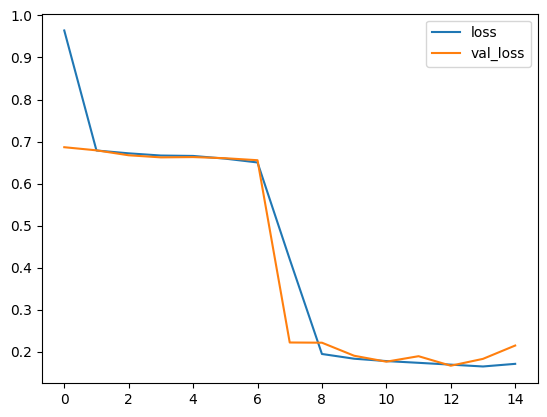

In [47]:
losses[['loss','val_loss']].plot()

In [48]:
model.metrics_names

['loss', 'accuracy']

In [49]:
model.evaluate(test_image_gen)

163/163 [==============================] - 6s 35ms/step - loss: 0.2150 - accuracy: 0.9362


[0.21502669155597687, 0.9361538290977478]

In [50]:
from tensorflow.keras.preprocessing import image

In [51]:
pred_probabilities = model.predict(test_image_gen)

  5/163 [..............................] - ETA: 5s

2022-12-12 12:45:30.528140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


163/163 [==============================] - 6s 35ms/step


In [52]:
pred_probabilities

array([[1.4091561e-06],
       [2.5176433e-10],
       [1.6913074e-07],
       ...,
       [8.3486849e-01],
       [9.4357669e-01],
       [9.2271978e-01]], dtype=float32)

In [53]:
predictions = pred_probabilities > 0.5

In [54]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1300
           1       0.92      0.95      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600



In [57]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1190,  110],
       [  64, 1236]])

#### Predicting On An Image

In [58]:
para_cell

'/Users/arthurkogan/Desktop/My_Keras_Pres/cell_images/train/parasitized/C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [59]:
my_image = image.load_img(para_cell,target_size=image_shape)

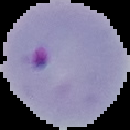

In [60]:
my_image

In [61]:
type(my_image)

PIL.Image.Image

In [62]:
my_image = image.img_to_array(my_image)

In [63]:
type(my_image)

numpy.ndarray

In [64]:
my_image.shape

(130, 130, 3)

In [65]:
my_image = np.expand_dims(my_image, axis=0)

In [66]:
my_image.shape

(1, 130, 130, 3)

In [67]:
if (model.predict(my_image)) < 0.5:
    print('parasitized')
else:
    print('uninfected')

1/1 [==============================] - 0s 64ms/step
parasitized


2022-12-12 12:45:36.374716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [68]:
my_image = image.load_img(uninfected_cell,target_size=image_shape)

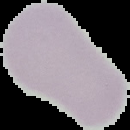

In [69]:
my_image

In [70]:
my_image = image.img_to_array(my_image)

In [71]:
my_image = np.expand_dims(my_image, axis=0)

In [72]:
if (model.predict(my_image)) < 0.5:
    print('parasitized')
else:
    print('uninfected')

1/1 [==============================] - 0s 10ms/step
uninfected


In [73]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [74]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

## THE END